# SAMueL-2 full production analysis

## Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from utils.data_process import DataProcess
from utils.descriptive_stats import DescriptiveStatistics
from utils.thrombolysis_choice_model import ThrombolysisChoiceModel
from utils.reporting import GlobalReport

## Create data for models

See 'data' folder for processing of raw data.

In [2]:
process_new_data = True

if process_new_data:
    data_processor = DataProcess(year_min=2019)
    data_processor.create_ml_data()
    data_processor.calculate_paramters_for_pathway_simulation()

All rows: 144473, ML rows:59909, Fraction: 0.41


## Descriptive statistics

In [3]:
ds = DescriptiveStatistics(year_min=2019)
ds.run()

## Thrombolysis decision model

Accuracy: 0.840
Balanced accuracy: 0.810
ROC AUC: 0.911
Actual thrombolysis: 0.305
Predicted thrombolysis: 0.301


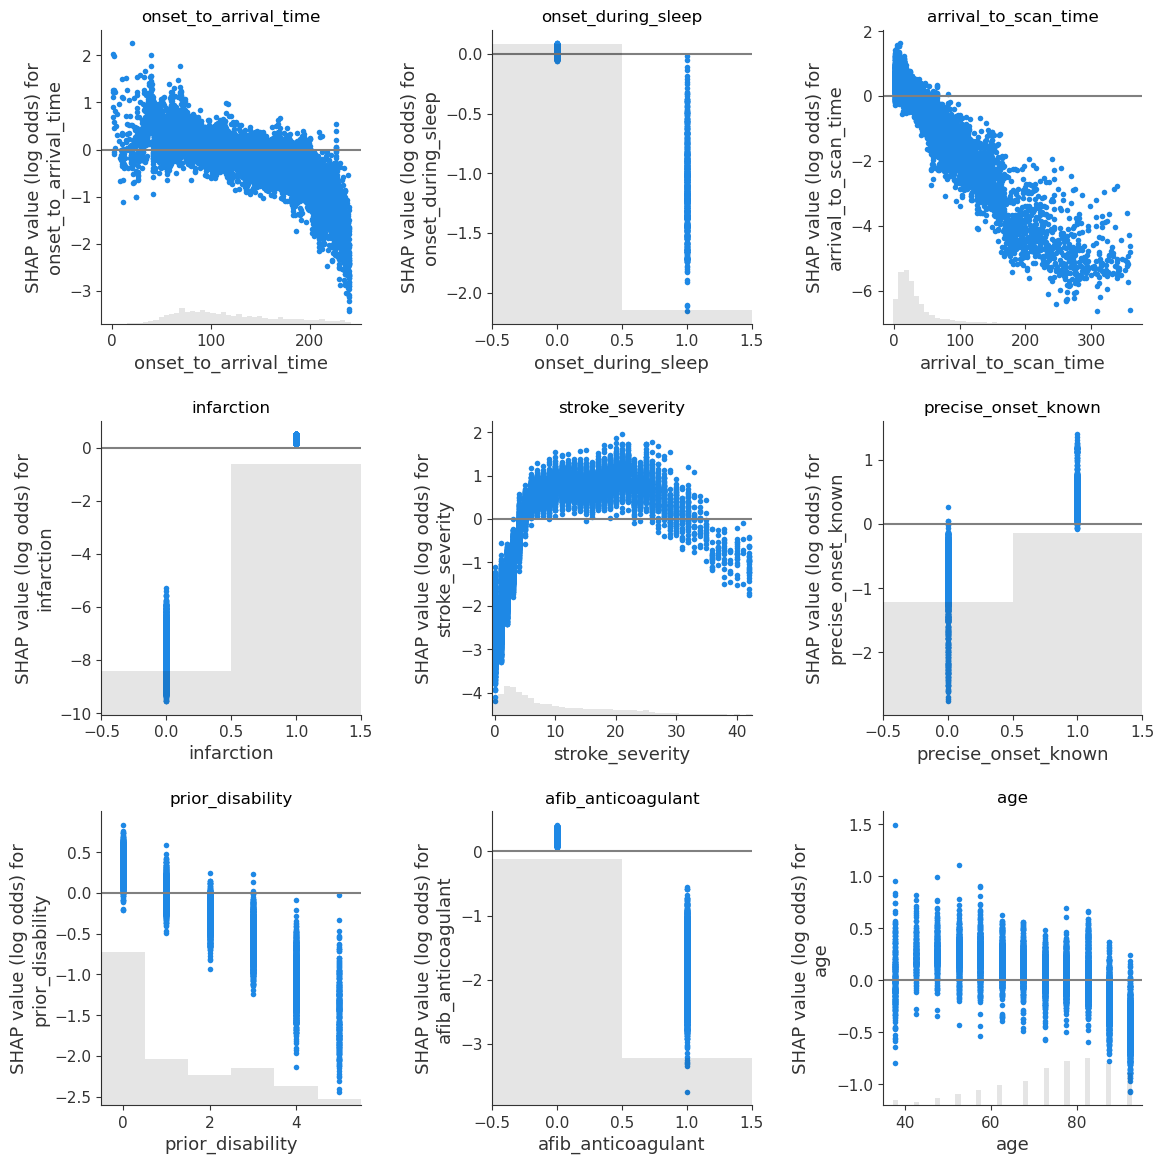

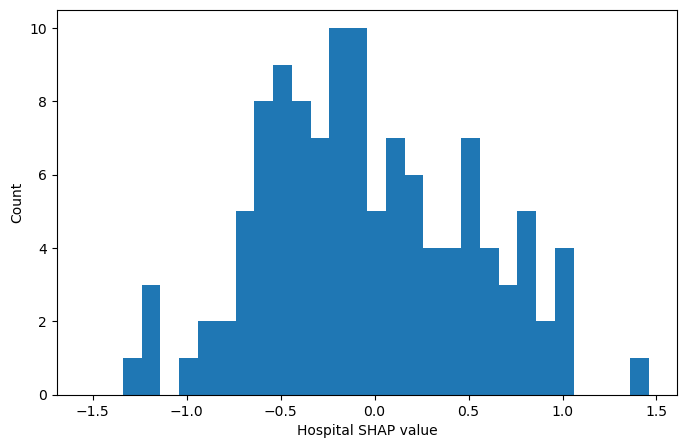

In [4]:
thrombolysis_choice_model = ThrombolysisChoiceModel()
thrombolysis_choice_model.run()

## Reporting

In [5]:
report = GlobalReport()
report.create_report()